In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [70]:
# Load Montgomery data into the dataframe.
montgomery_df = pd.read_csv('house_info_school_assignments_dropna_transform.csv')
montgomery_df

,price,bathrooms,bedrooms,livingArea,homeType,lotAreaValue,zipcode,elem,middle,high
0,800000,4.0,5.0,3650.0,SINGLE_FAMILY,222156.0,20854,wayside elementary,herbert hoover middle,winston churchill high
1,800000,1.0,2.0,1400.0,SINGLE_FAMILY,10890.0,20814,kensington parkwood elementary,tilden middle,walter johnson high
2,800000,3.0,4.0,1826.0,SINGLE_FAMILY,9148.0,20817,bethesda elementary,tilden middle,walt whitman high
3,800000,3.0,4.0,2810.0,SINGLE_FAMILY,9811.0,20854,ritchie park elementary,cabin john middle,winston churchill high
4,800000,4.0,3.0,2304.0,SINGLE_FAMILY,6570.0,20910,rosemary hills elementary,tilden middle,northwood high
...,...,...,...,...,...,...,...,...,...,...
11413,358000,3.0,3.0,1673.0,TOWNHOUSE,2001.0,20879,strawberry knoll elementary,gaithersburg middle,gaithersburg high
11414,358500,4.0,5.0,1386.0,TOWNHOUSE,1650.0,20877,flower hill elementary,gaithersburg middle,gaithersburg high
11415,358888,3.0,3.0,1420.0,TOWNHOUSE,2160.0,20878,summit hall elementary,lakelands park middle,gaithersburg high
11416,359000,2.0,3.0,1188.0,TOWNHOUSE,1206.0,20878,dufief elementary,lakelands park middle,quince orchard high


In [71]:
# Load school ratings data.
mcps_school_df = pd.read_csv('mcps_school_ratings_clean.csv')

# Keep only the school name and rating.
mcps_school_df = mcps_school_df[['School', 'Rating']]

mcps_school_df

,School,Rating
0,burning tree elementary,10.0
1,spark m. matsunaga elementary,9.0
2,bannockburn elementary,9.0
3,bells mill elementary,9.0
4,cold spring elementary,9.0
...,...,...
194,watkins mill high,4.0
195,northwood high,3.0
196,gaithersburg high,3.0
197,john f. kennedy high,3.0


In [72]:
montgomery_df = montgomery_df.merge(mcps_school_df, left_on='elem', right_on='School')
montgomery_df = montgomery_df.rename(columns={'Rating':'elemRating'})
montgomery_df = montgomery_df.drop(columns=['elem', 'School'])

In [73]:
montgomery_df = montgomery_df.merge(mcps_school_df, left_on='middle', right_on='School')
montgomery_df = montgomery_df.rename(columns={'Rating':'middleRating'})
montgomery_df = montgomery_df.drop(columns=['middle', 'School'])

In [74]:
montgomery_df = montgomery_df.merge(mcps_school_df, left_on='high', right_on='School')
montgomery_df = montgomery_df.rename(columns={'Rating':'highRating'})
montgomery_df = montgomery_df.drop(columns=['high', 'School', 'zipcode'])

In [75]:
# homeType is categorical variable. Create dummy variables.
montgomery_df = pd.get_dummies(montgomery_df, columns=["homeType"])
montgomery_df = montgomery_df.dropna()
montgomery_df

,price,bathrooms,bedrooms,livingArea,lotAreaValue,elemRating,middleRating,highRating,homeType_CONDO,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE
0,800000,4.0,5.0,3650.0,222156.000000,8.0,9.0,8.0,0,1,0
1,802909,2.0,5.0,2188.0,77513.999999,8.0,9.0,8.0,0,1,0
2,825000,3.0,4.0,3050.0,87120.000000,8.0,9.0,8.0,0,1,0
3,1120000,6.0,5.0,5399.0,111949.000016,8.0,9.0,8.0,0,1,0
4,1150000,5.0,5.0,5168.0,145054.999984,8.0,9.0,8.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
11413,735405,2.0,3.0,2014.0,7533.000000,7.0,6.0,4.0,0,1,0
11414,745000,3.0,4.0,1532.0,7905.000000,7.0,6.0,4.0,0,1,0
11415,750000,2.0,2.0,1987.0,6554.000000,7.0,6.0,4.0,0,1,0
11416,755405,2.0,4.0,1841.0,6355.000000,7.0,6.0,4.0,0,1,0


In [76]:
# Separate features and target.
X = montgomery_df.drop(columns=['price'])
Y = montgomery_df['price']
print (f'Separating features and target: {X.shape} | {Y.shape}')

Separating features and target: (11263, 10) | (11263,)


In [77]:
# Split data into training and testing sets. 80% data is used for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=100)
print(f'After splitting data: X train:{X_train.shape}, Y train: {Y_train.shape}, \
X test: {X_test.shape}, Y test: {Y_test.shape}')

After splitting data: X train:(9010, 10), Y train: (9010,), X test: (2253, 10), Y test: (2253,)


In [78]:
# Instantiate a linear regression model and fit on training dataset.
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [79]:
# Make predictions on testing data.
Y_pred = lin_model.predict(X_test)

In [80]:
# Print the model coefficients.
print (f'Model intercept: {lin_model.intercept_}, Model coefficients: {lin_model.coef_}')

Model intercept: -382574.1868643372, Model coefficients: [ 6.06745803e+04  1.04682604e+04  1.06530029e+02  6.45624589e-04
 -7.19685796e+01  2.69610550e+04  5.82280920e+04 -7.87476309e+04
  1.21544017e+05 -4.27963863e+04]


In [81]:
# Print RMSE and accuracy.

# The mean squared error
print (f'Mean squared error: {mean_squared_error(Y_test, Y_pred):.2f}')

# Model accuracy:
print (f'Training accuracy: {lin_model.score(X_train, Y_train):.2f}')
print (f'Testing accuracy: {lin_model.score(X_test, Y_test):.2f}')

Mean squared error: 45042105802.18
Training accuracy: 0.73
Testing accuracy: 0.70


In [82]:
# The sklearn linear model fit doesn't give p-value information. To get this info and display
# it in a table, we will use statsmodels instead. 
# Source: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
import statsmodels.api as sm

X2_train = sm.add_constant(X_train)
lin_mod = sm.OLS(Y_train,X2_train)

fii = lin_mod.fit()
summary = fii.summary2()
print (summary)

                            Results: Ordinary least squares
Model:                      OLS                    Adj. R-squared:           0.731      
Dependent Variable:         price                  AIC:                      245904.1598
Date:                       2021-09-16 22:06       BIC:                      245975.2207
No. Observations:           9010                   Log-Likelihood:           -1.2294e+05
Df Model:                   9                      F-statistic:              2715.      
Df Residuals:               9000                   Prob (F-statistic):       0.00       
R-squared:                  0.731                  Scale:                    4.1684e+10 
----------------------------------------------------------------------------------------
                          Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                  -286930.6401 11234.6790 -25

In [83]:
# Now, instantiate the Random Forrest model.

# Test out different random forrest models accuracy against different number of estimators.

x_val = []
y_val = []

for n in range(3, 31):
    rf_model = RandomForestRegressor(criterion='mae', n_estimators=n, random_state=50)
    rf_model = rf_model.fit(X_train, Y_train)
    Y_pred = rf_model.predict(X_test)
    
    x_val.append(n)
    y_val.append(rf_model.score(X_test, Y_test))

    # The mean squared error
    print (f'n {n} | MSE {mean_squared_error(Y_test, Y_pred):.2f} | \
    Training Accuracy {rf_model.score(X_train, Y_train):.2f} | Testing Accuracy {rf_model.score(X_test, Y_test):.2f}')


n 3 | MSE 31409402847.06 |     Training Accuracy 0.95 | Testing Accuracy 0.79
n 4 | MSE 29848551676.67 |     Training Accuracy 0.96 | Testing Accuracy 0.80
n 5 | MSE 28054593527.38 |     Training Accuracy 0.96 | Testing Accuracy 0.81
n 6 | MSE 27080847932.02 |     Training Accuracy 0.96 | Testing Accuracy 0.82
n 7 | MSE 26881762009.55 |     Training Accuracy 0.97 | Testing Accuracy 0.82
n 8 | MSE 26693047149.32 |     Training Accuracy 0.97 | Testing Accuracy 0.82
n 9 | MSE 26512232512.05 |     Training Accuracy 0.97 | Testing Accuracy 0.82
n 10 | MSE 26555975420.81 |     Training Accuracy 0.97 | Testing Accuracy 0.82
n 11 | MSE 26291901810.23 |     Training Accuracy 0.97 | Testing Accuracy 0.83
n 12 | MSE 26063760400.41 |     Training Accuracy 0.97 | Testing Accuracy 0.83
n 13 | MSE 25796656925.13 |     Training Accuracy 0.97 | Testing Accuracy 0.83
n 14 | MSE 25597990850.25 |     Training Accuracy 0.97 | Testing Accuracy 0.83
n 15 | MSE 25408242743.24 |     Training Accuracy 0.97 | Te

<AxesSubplot:xlabel='x'>

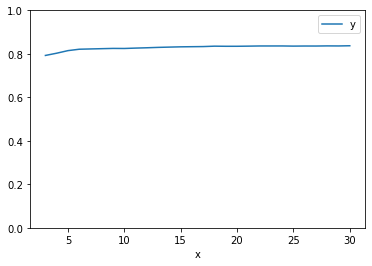

In [84]:
df = pd.DataFrame(list(zip(x_val, y_val)), columns =['x', 'y'])
df.plot.line(x='x', y='y', ylim=(0, 1.0))